Conexión al variador utilizando conversor RS232-RS485. Lee el estado de 4 registros indicados en el manual de comunicación modbus.

In [1]:
import pymodbus
from pymodbus.pdu import ModbusRequest
from pymodbus.client.sync import ModbusSerialClient as ModbusClient
from pymodbus.transaction import ModbusRtuFramer

client = ModbusClient(method='rtu', port="COM6", baudrate=19200, parity='E', timeout=0.1)
connection = client.connect()

read_vals  = client.read_holding_registers(3102, 4, unit=1) # start_address, count, slave_id
print(read_vals.registers)

[40, 600, 500, 50]


Cada vez que se utiliza el método read_holding_registers() se establece la comunicación, no es necesario configurar la configuración o iniciarla luego de ejecutar la celda anterior.

In [7]:
read_vals  = client.read_holding_registers(3102, 4, unit=1) # start_address, count, slave_id
print(read_vals.registers)

[40, 600, 500, 50]


cerrar la conexión

In [8]:
client.close()

In [55]:
read_vals  = client.read_holding_registers(3207, 1, unit=1) # start_address, count, slave_id
print(read_vals.registers)

[2189]


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import time


Gráfica de la tensión de red, primero se adquieren los datos y luego se crea el gráfico.

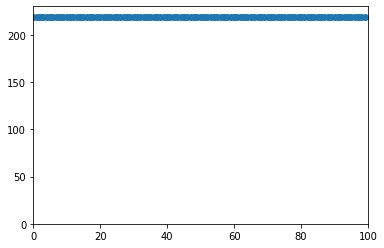

In [67]:
plt.ion()
fig=plt.figure()
plt.axis([0,100,0,230])
contador = 0
x=list()
y=list()
while contador<100:
    read = client.read_holding_registers(3207, 1, unit=1)
    voltaje = read.registers[0]/10
    x.append(contador)
    y.append(voltaje)
    contador +=1
    time.sleep(0.3)

plt.scatter(x,y)

Text(0, 0.5, 'voltaje [V]')

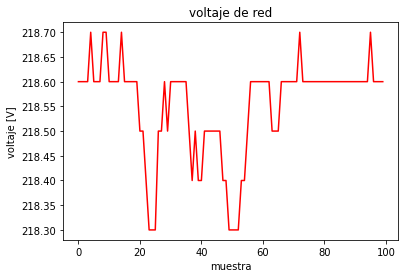

In [74]:
fig2=plt.figure()
plt.plot(x,y,'r')
plt.axis
plt.title('voltaje de red')
plt.xlabel('muestra')
plt.ylabel('voltaje [V]')

In [52]:
voltaje[0]

2186

Lectura de registros binarios

In [ ]:
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.constants import Endian

In [92]:
read_vals  = client.read_holding_registers(3207, 1, unit=1) # start_address, count, slave_id
print(BinaryPayloadDecoder.fromRegisters(read_vals.registers, Endian.Big, Endian.Little).decode_bits())

[False, False, False, True, False, False, False, False]
